![image](img/img1.JPEG)

<a class="anchor" id="0"></a>
# **A Reference Guide to Feature Selection Methods**

**Feature Selection** is the process of selecting optimal number of features from a larger set of features. There are several advantages of this feature selection process and also there are various techniques available for this feature selection process. In this notebook, we will look at these advantages and various techniques for feature selection.


So, let's get started.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.  [Univariate Selection Methods](#1)
   - 2.2.1 [SelectKBest](#1.1)
   - 2.2.2 [SelectPercentile](#1.2)
   
2.  [Correlation heatmap](#2)
3.  [Recursive Feature Elimination](#3)
   - 3.1 [Recursive Feature Elimination with Cross-Validation](#3.1)
4. [Embedded Methods](#4)
   - 4.1 [LASSO Regression](#4.1)
   - 4.2 [Random Forest Importance](#4.2)
5. [How to choose the right feature selection method](#6)

## **1. Univariate selection methods** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


- Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

- There are 2 methods that fall under this category :-

  1. SelectKBest
  2. SelectPercentile
  
Source : https://scikit-learn.org/stable/modules/feature_selection.html

## **1.1 SelectKBest** <a class="anchor" id="1.1"></a>

[Table of Contents](#0.1)

- This method select features according to the k highest scores.

- For instance, we can perform a chi-square test to the samples to retrieve only the two best features from iris dataset as follows:

Source : https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [93]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [94]:
# select the two best features
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

- Thus, we have selected the two best features from the iris dataset.

## **1.2 SelectPercentile** <a class="anchor" id="1.2"></a>

[Table of Contents](#0.1)


- Select features according to a percentile of the highest scores.

Source : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

In [95]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape


(1797, 64)

In [96]:
# now select features based on top 10 percentile
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

- We can see that only 7 features lie on the top 10 percentile and hence we select them accordingly.

## **2 Correlation-Matrix with Heatmap** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


- **Correlation** is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

- **Good variables are highly correlated with the target**.

- Correlated predictor variables provide redundant information.

- **Variables should be correlated with the target but uncorrelated among themselves**.


- Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: 

   - "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".
   
   
- In this section,  I will demonstrate how to select features based on correlation between two features. We can find features that are correlated with each other. By identifying these features, we can then decide which features we want to keep, and which ones we want to remove.


- Using Pearson correlation our returned coefficient values will vary between -1 and 1.

- If the correlation between two features is 0 this means that changing any of these two features will not affect the other.

- If the correlation between two features is greater than 0 this means that increasing the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).

- If the correlation between two features is less than 0 this means that increasing the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).

- In this analysis we will check if the selected variables are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [105]:
# Load iris data
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [106]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [107]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


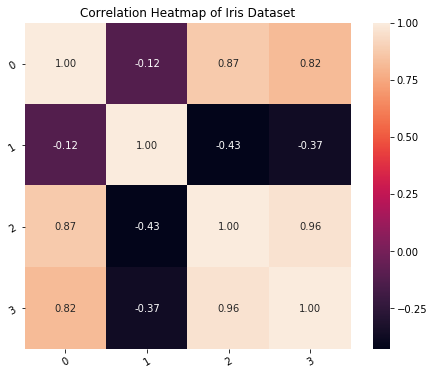

In [108]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    


In [109]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper    

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [110]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[3]


In [111]:
# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)


       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]


- We can see that we have dropped the third column from the original dataset.

## **3 Recursive Feature elimination** <a class="anchor" id="3"></a>

[Table of Contents](#0.1) 


- It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

- Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

- Source : https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py

In [2]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

C:\Users\paul\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\paul\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\paul\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
X, y = make_friedman1(n_samples=50, n_features = 10, random_state = 0)
estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=5, step = 1)
selector = selector.fit(X,y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [5]:
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

## **3.1 Recursive Feature Elimination with Cross-Validation** <a class="anchor" id="3.1"></a>

[Table of Contents](#0.1) 


- **Recursive Feature Elimination with Cross-Validated (RFECV)** feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination.

- Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.
- Source : https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [6]:
from sklearn.feature_selection import RFECV

In [7]:
X, y = make_friedman1(n_samples=50, n_features = 10, random_state = 0)
estimator = SVR(kernel='linear')
selector = RFECV(estimator, cv =5 , step = 1)
selector = selector.fit(X,y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [8]:
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

# **4. Embedded Methods** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


- Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

- This is why Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

- Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.

- Embedded methods can be explained with the help of following graphic:


## **4.1 ** LASSO Regression<a class="anchor" id="4.1"></a>

[Table of Contents](#0.1)


- Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

- Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

- I will demonstrate how to select features using the Lasso regularisation on the House Price dataset from Kaggle.

In [125]:
#load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [126]:
# load dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.shape

(1460, 81)

In [127]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [128]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [129]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale them

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=100, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [131]:
sel_.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [132]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 37
selected features: 33
features with coefficients shrank to zero: 4


- We can see that Lasso regularisation helps to remove non-important features from the dataset. So, increasing the penalisation will result in increase the number of features removed. Therefore, we need to keep an eye and monitor that we don't set a penalty too high so that to remove even important features, or too low and then not remove non-important features.

- If the penalty is too high and important features are removed, we will notice a drop in the performance of the algorithm and then realise that we need to decrease the regularisation.

## **4.2 ** Random Forest Importance<a class="anchor" id="4.2"></a>

[Table of Contents](#0.1)

- Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

In [1]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [2]:

# instantiate the classifier with n_estimators = 100
clf = RandomForestRegressor(n_estimators=100, random_state=0)


In [1]:
# fit the classifier to the training set
# clf.fit(X_train, y_train)

In [141]:
# predict on the test set
y_pred = clf.predict(X_test)

## **Feature Importance**

- Decision Trees models which are based on ensembles (eg. Extra Trees and Random Forest) can be used to rank the importance of the different features. Knowing which features our model is giving most importance can be of vital importance to understand how our model is making it’s predictions (therefore making it more explainable). At the same time, we can get rid of the features which do not bring any benefit to our model.

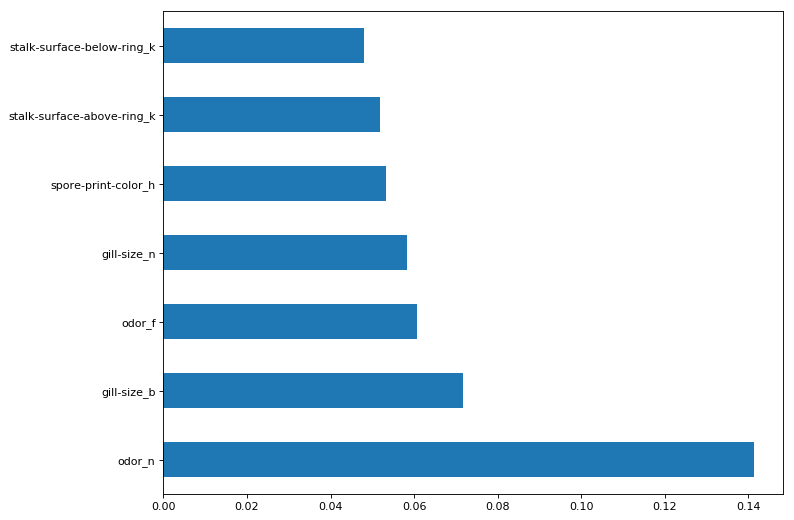

In [142]:
# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(7).plot(kind='barh')

- Now we know which features are most important in the Random Forest model, we can train our model just using these features. 

## **6  What Is the Best Method?**  <a class="anchor" id="6"></a>

- There is no best feature selection method. Just like there is no best set of input variables or best machine learning algorithm. 

- Instead, we must discover what works best for your specific problem using careful systematic experimentation.

- We should try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.



- The 4 practical ways of feature selection which yield best results are as follows:-

    1. SelectKBest
    2. Recursive Feature Elimination
    3. Correlation-matrix with heatmap
    4. Random-Forest Importance

[Go to Top](#0)